In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import gzip

In [5]:
import sys
sys.path.append("/Users/casey/git/mumodo/packages")

In [6]:
from mumodo import mumodoIO as mm

In [7]:
import os

folders = os.listdir('../cleaned')

len(folders)

14

In [8]:
def getstrings(xmline):
    xmline = xmline.strip()
    xmline = xmline.split(' ')
    found = {}
    for x in xmline:
        if '=' in x:
            x = x.replace('"', '').replace('>','')
            x = x.split("=")
            found[x[0]] = x[1]
    return found

In [9]:
data = {}

for f in folders:  
    pid = f.split("_")[0]
    frame =  gzip.open(os.path.join('../cleaned/', f, 'log.xio.gz'))
    d = []
    for line in frame:
        s = getstrings(line)
        if 'sensorName' not in s: continue
        if 'TASK' in s['sensorName']:
            d.append(s['value'])
    data[pid] = d

In [10]:
def init_counter(q):
    if 'p2' in q:
        return {'Phase1':0, 'Phase2':0}
    return {'Phase3':0, 'Phase2':0}

In [11]:
def handle_responses(data):
    
    responses = {}
    totals = {}
    for pid in data:
        frame = data[pid]
        for row in frame:
            if 'response' not in row: continue
            row = row.split(':')
            q = row[1]
            a = row[2]
            if q not in responses:
                totals[q] = 0.0
                responses[q] = {}
                responses[q] = init_counter(q)
            totals[q] = totals[q] + 1
            if a == 'Beide':
                for p in responses[q]:
                    responses[q][p] + 1.0
                continue
            elif a == 'Keiner':
                continue
            else:
                responses[q][a] = responses[q][a] + 1.0
    print totals
    return responses


In [12]:
responses = handle_responses(data)

{'p3q12': 14.0, 'p3q10': 14.0, 'p3q11': 14.0, 'p3q8': 14.0, 'p3q9': 14.0, 'p3q4': 14.0, 'p3q5': 14.0, 'p2q10': 12.0, 'p2q1': 12.0, 'p2q3': 12.0, 'p2q2': 12.0, 'p2q5': 12.0, 'p2q4': 12.0, 'p2q7': 12.0, 'p2q6': 12.0, 'p2q9': 12.0, 'p2q8': 12.0, 'p3q6': 14.0, 'p3q7': 14.0, 'p3q1': 14.0, 'p3q2': 14.0, 'p3q3': 14.0}


In [22]:
from scipy.stats import chisquare 

def getstatsig(o):
    observed = np.array(o)
    expected = np.array([0.5,0.5]) * np.sum(observed)
    return chisquare(observed, expected)

In [52]:
import matplotlib.pyplot as plt
keys = responses.keys()
i = 0

p3q11
(6.0, 0.014305878435429641)


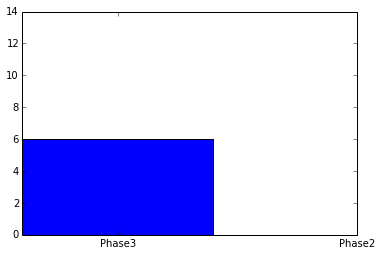

In [55]:
print keys[i]
D = responses[keys[i]]
print getstatsig(D.values())
plt.bar(range(len(D)), D.values(), align='center')
plt.xticks(range(len(D)), D.keys())
plt.gca().set_ylim([0,14])
i += 1

In [ ]:
 X2 (2, N = 14) = 4.0, p <.05